In [18]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from planar import BoundingBox
import numpy as np


X = np.random.uniform(low=0.0, high=0.2, size=(100,2))
first_x = X

vor = Voronoi(X,)

<class 'matplotlib.figure.Figure'>


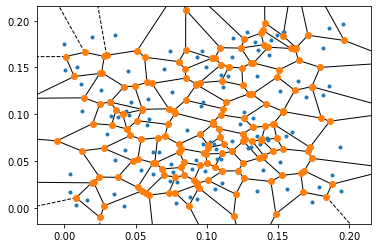

In [19]:
fig = voronoi_plot_2d(vor)
print(type(fig))
plt.show()



In [20]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(X)
kmeans.labels_

# kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_



array([[0.09888917, 0.09312028]])

In [21]:
kmeans.cluster_centers_, X[0]

(array([[0.09888917, 0.09312028]]), array([0.08643856, 0.08375979]))

In [24]:

def furthest_point(vor_vertices, bounding_box):
    """ Function gets voronoi vertices and bounding box and return furthest point"""
    
    max_point = [round(num, 1) for num in bounding_box.max_point]
    min_point = [round(num, 1) for num in bounding_box.min_point]
    
    max_dist = float('-inf')
    max_location = np.array([float('-inf'),float('-inf')])
    
    for p in vor.vertices:
        if (min_point[0] >= p[0] and min_point[0] <= p[0]) and (max_point[1] >= p[1] and max_point[1] <= p[1]):
            temp_max = distance.euclidean(kmeans.cluster_centers_, p)
            if  temp_max > max_dist:
                max_dist = temp_max
                max_location = p
    
    bottom_line = np.linspace(min_point[0], max_point[0], num=5) # bottom line
    top_line    = np.linspace(max_point[1], max_point[0], num=5) # top line
    left_line   = np.linspace(min_point[0], max_point[1], num=5) # far left line
    right_line  = np.linspace(max_point[0], max_point[1], num=5) # far left line
    
    # range of points on each line
    bl = [np.array([x,min_point[0]]) for x in bottom_line]
    tl = [np.array([x,max_point[1]]) for x in top_line]
    ll = [np.array([min_point[0], x]) for x in left_line]
    rl = [np.array([max_point[0], x]) for x in right_line]
    
    box_points = np.concatenate((bl, tl), axis=0)
    box_points = np.concatenate((box_points, ll), axis=0)
    box_points = np.concatenate((box_points, rl), axis=0)
    # uniques = np.unique(box_points)
    # uniques
    box_points
    x1 = np.random.rand(box_points.shape[1])
    y = box_points.dot(x1)
    unique, index = np.unique(y, return_index=True)
    box_points[index]

    for p in box_points[index]:
        temp_max = distance.euclidean(kmeans.cluster_centers_, p)
        if  temp_max > max_dist:
            max_dist = temp_max
            max_location = p
    return max_dist, max_location

bbox = BoundingBox([(0,0),(1,1)])
max_distance, location = furthest_point(vor.vertices,bbox)
max_distance, location

(1.278448885683634, array([1., 1.]))

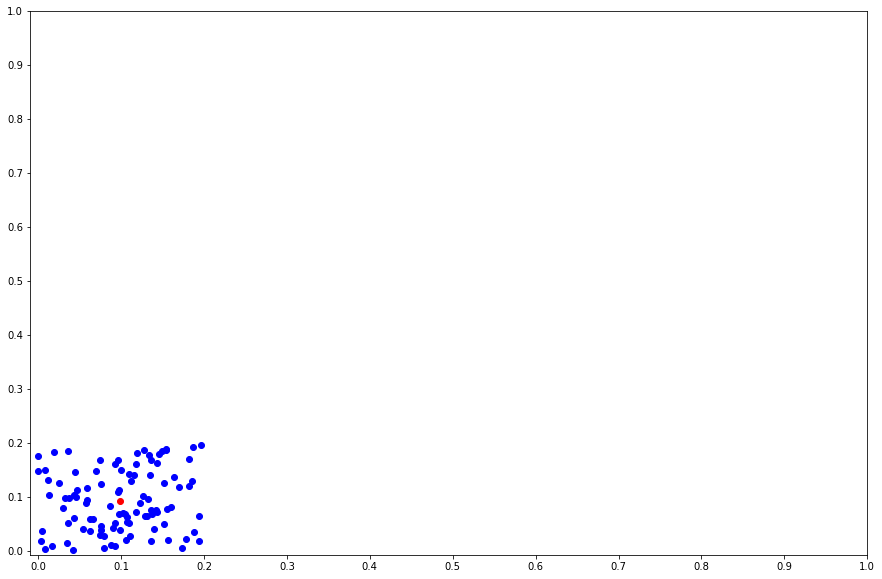

Score of K-mean objective function: -0.6037779850602639


In [25]:

def show_plot(center, data):
    red = [1, 0, 0]
    green = [0, 1, 0]
    blue = [0, 0, 1]
    colors = [red]
    x = center[:,0]
    y = center[:,1]


    fig, ax = plt.subplots(figsize=(15, 10))

    ax.scatter(data[:,0], data[:,1], c=[blue])
    ax.scatter(x, y, c=colors)

    ax.set_xticks(np.arange(0.0, 1.1, 0.1))
    ax.set_yticks(np.arange(0.0, 1.1, 0.1))

    plt.show()
   
    
show_plot(kmeans.cluster_centers_, X)
print(f"Score of K-mean objective function: {kmeans.score(X)}")

In [27]:

X = np.append(X, np.array([[1.0,1.0]]*3000), axis=0)

kmeans = KMeans(n_clusters=1, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

kmeans.score(X)

-158.77457346622452

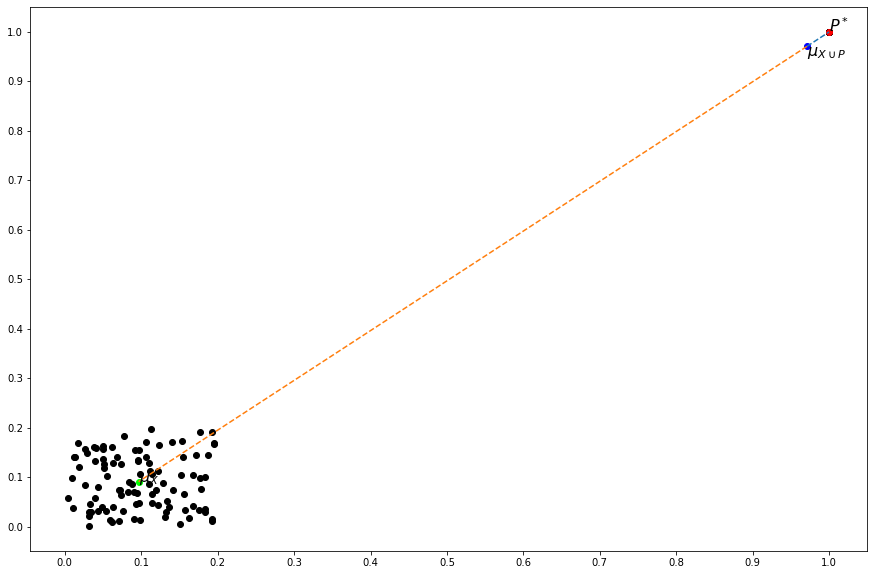

size of X: 6200
Score of K-mean objective function: -159.4741193084148


In [100]:
def show_new_mean_plot(center, data):
    x = kmeans.cluster_centers_[:,0]
    y = kmeans.cluster_centers_[:,1]

    point1 = kmeans.cluster_centers_
    point2 = np.array([[1.0,1.0]])
    point3 = np.mean(first_x,axis=0).reshape((1,2))

    x_values = [point1[:,0], point2[:,0]]
    y_values = [point1[:,1], point2[:,1]]

    x3_values = [point1[:,0], point3[:,0]]
    y3_values = [point1[:,1], point3[:,1]]


    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(x_values, y_values, linestyle="--")
    ax.plot(x3_values, y3_values, linestyle="--")
    # ax.plot([0.6], [0.16], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")

    ax.scatter(X[:,0], X[:,1], c=[[0, 0, 0]]) # original cluster
    ax.scatter(1.0, 1.0, c=[red])             # m poision points
    ax.scatter(x, y, c=[blue])                # new mean after (X U P)
    ax.scatter(point3[:,0], point3[:,1], c=[green])
    ax.annotate(r'$\mu_{X}$', (point3[:,0],point3[:,1]), color='black',size=16) 
    ax.annotate(r'$\mu_{X \cup P}$', (x,y-.02), color='black',size=16) 

    ax.annotate(r'$P^*$', (1,1), color='black',size=16) 

    ax.set_xticks(np.arange(0.0, 1.1, 0.1))
    ax.set_yticks(np.arange(0.0, 1.1, 0.1))

    plt.show()

    # [1.0,1.0]]
    # np.mean(first_x,axis=0)
    # np.mean(X,axis=0)
    print(f"size of X: {X.size}")
    print(f"Score of K-mean objective function: {kmeans.score(X)}")

